In [53]:
#imports
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import time

In [35]:
#basic integration of relay model
def basic_relay_model(t, i_ndarray):
    #accept  scalar t, and ndarray of y values
    #basic RHS of relay equation is -R/Li + V. for now we will use static values
    #return ndarray
    resistance = 1
    inductance = 1
    voltage = 1
    #scipy.integrate.solve_ivp wants this array returned as a tuple
    y_prime_array = tuple([-resistance/inductance*i+voltage for i in i_ndarray],)
    return y_prime_array

In [36]:
#insert model function into solver
tspan = (0,5) #scipy wants tspan in a tuple
initial_current = (0,)  #scipy wants the initial conditions in a tuple
max_step = 0.01
#returns bunch object which has a bunch of info including the time ndarray and corresponding y ndarray
solution = solve_ivp(basic_relay_model, tspan, initial_current, max_step=max_step)

503


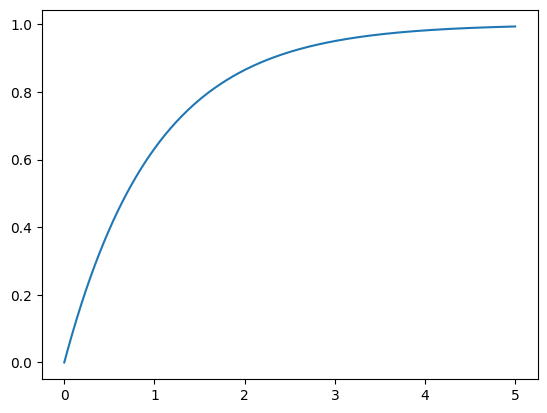

In [37]:
#display results
#solution.y is shape (n,n_points)... I think to output y,y',y'' if needed.
#we only need y value, so index the first row
y = solution.y[0]
print(len(y))
plt.plot(solution.t, y)

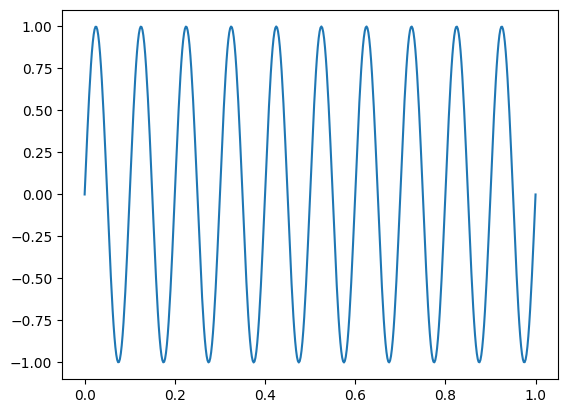

In [38]:
#testing forcing function
voltage_amplitude = 1
voltage_frequency = 10
time_array = np.linspace(0,1,500)
voltage_curve = [voltage_amplitude*np.sin(voltage_frequency*2*np.pi*t) for t in time_array]
plt.plot(time_array, voltage_curve)

In [39]:
#ok now that we have the basic model lets make the relay_model customizable.
def basic_relay_model_generator(resistance, inductance, voltage_amplitude, voltage_frequency):
    def basic_relay_model(t, i_ndarray):
        #creating forcing function
        voltage = voltage_amplitude*np.sin(voltage_frequency*2*np.pi*t)

        y_prime_array = tuple([-resistance/inductance*i+voltage for i in i_ndarray],)
        return y_prime_array
    return basic_relay_model

max current is 0.13333333333333333


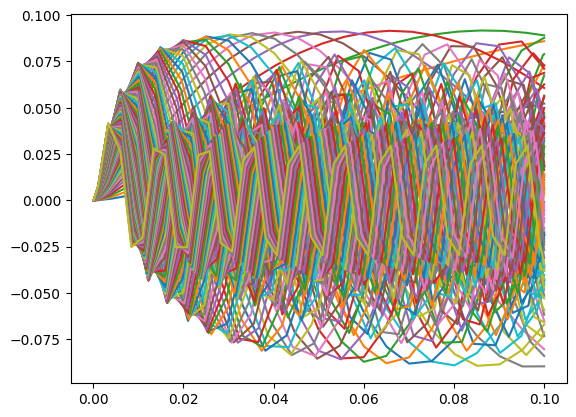

In [57]:
#test inductance sensitivity
voltage_amplitude = 24
resistance = 180
t_span = (0,0.1)
solution_list = []
for inductance in [0.69]:
    for voltage_frequency in range(1,100):
        solution_list.append(solve_ivp(basic_relay_model_generator(resistance, inductance, voltage_amplitude, voltage_frequency)
                                            , t_span, initial_current, max_step=0.005))

for solution in solution_list:
    y = solution.y[0]
    plt.plot(solution.t, y)
print(f"max current is {voltage_amplitude/resistance}")
